In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
%matplotlib inline

/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Linear Regression - Afternoon

## A utility function that we'll use later

In [2]:
def dummify(df,column):
    print '{} is your baseline'.format(sorted(df[column].unique())[-1])
    dummy = pd.get_dummies(df[column]).rename(columns=lambda x: column+'_'+str(x)).iloc[:,0:len(df[column].unique())-1]
    df = df.drop(column,axis=1)
    return pd.concat([df,dummy],axis=1)

## Examine the credit data set

In [3]:
df_cred = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Credit.csv', index_col=0)
df_cred.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [4]:
df_cred.describe().T

,count,mean,std,min,25%,50%,75%,max
Income,400.0,45.218885,35.244273,10.354,21.00725,33.1155,57.47075,186.634
Limit,400.0,4735.600000,2308.198848,855.000,3088.00000,4622.5000,5872.75000,13913.000
Rating,400.0,354.940000,154.724143,93.000,247.25000,344.0000,437.25000,982.000
Cards,400.0,2.957500,1.371275,1.000,2.00000,3.0000,4.00000,9.000
Age,400.0,55.667500,17.249807,23.000,41.75000,56.0000,70.00000,98.000
Education,400.0,13.450000,3.125207,5.000,11.00000,14.0000,16.00000,20.000
Balance,400.0,520.015000,459.758877,0.000,68.75000,459.5000,863.00000,1999.000


## We can also interact with statsmodels via formulas (will look familiar to R users)

In [5]:
est = smf.ols(formula='Balance ~ Income', data=df_cred).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 29 Aug 2017   Prob (F-statistic):           1.03e-22
Time:                        12:40:03   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
# adding dummies to the model
# try with and without the rename
dummies = pd.get_dummies(df_cred['Married']).rename(columns = lambda x: 'Married_'+str(x))
df_cred1 = pd.concat([df_cred,dummies],axis=1)

In [7]:
df_cred1.head()

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Married_No,Married_Yes
1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0,1
2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,0,1
3,104.593,7075,514,4,71,11,Male,No,No,Asian,580,1,0
4,148.924,9504,681,3,36,11,Female,No,No,Asian,964,1,0
5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331,0,1


In [8]:
# Perfect collinearity, but statsmodels doesn't care
df_cred1 = sm.add_constant(df_cred1)
sm.OLS(df_cred1['Balance'],(df_cred1[['Income','Married_Yes','Married_No','const']])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.212
Method:                 Least Squares   F-statistic:                     54.52
Date:                Tue, 29 Aug 2017   Prob (F-statistic):           1.20e-21
Time:                        12:40:03   Log-Likelihood:                -2970.8
No. Observations:                 400   AIC:                             5948.
Df Residuals:                     397   BIC:                             5960.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Income          6.0587      0.580     10.441      0.000       4.918       7.199
Married_Yes    72.3242     22.603      3.200      0.001      27.888     116.760
Married_No     93.2788     24.831      3.757      0.000      44.462     142.095
const         165.6031     22.297      7.427      0.000     121.769     209.438
==============================================================================
Omnibus:                       44.240   Durbin-Watson:                   1.953
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.104
Skew:                           0.380   Prob(JB):                     2.61e-05
Kurtosis:                       2.170   Cond. No.                     4.59e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.23e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [9]:
# Let's fit with an intercept and then without.
# LOOK AT THE R2! WHAT?!

est=smf.ols(formula='Balance ~ Income', data=df_cred).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     109.0
Date:                Tue, 29 Aug 2017   Prob (F-statistic):           1.03e-22
Time:                        12:40:03   Log-Likelihood:                -2970.9
No. Observations:                 400   AIC:                             5946.
Df Residuals:                     398   BIC:                             5954.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    246.5148     33.199      7.425      0.000     181.247     311.783
Income         6.0484      0.579     10.440      0.000       4.909       7.187
==============================================================================
Omnibus:                       42.505   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.975
Skew:                           0.384   Prob(JB):                     2.79e-05
Kurtosis:                       2.182   Cond. No.                         93.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Specifying the baseline category

est=smf.ols(formula='Balance ~ Gender * Income',data=df_cred).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Balance   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     36.32
Date:                Tue, 29 Aug 2017   Prob (F-statistic):           9.37e-21
Time:                        12:40:03   Log-Likelihood:                -2970.7
No. Observations:                 400   AIC:                             5949.
Df Residuals:                     396   BIC:                             5965.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 227.7682     47.857      4.759      0.000     133.683     321.853
Gender[T.Female]           36.0236     66.574      0.541      0.589     -94.860     166.907
Income                      6.1836      0.828      7.472      0.000       4.557       7.811
Gender[T.Female]:Income    -0.2589      1.161     -0.223      0.824      -2.542       2.024
==============================================================================
Omnibus:                       41.471   Durbin-Watson:                   1.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.734
Skew:                           0.383   Prob(JB):                     3.14e-05
Kurtosis:                       2.189   Cond. No.                         247.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#use my fancy little dummy function
dummify(df_cred,'Ethnicity')

Caucasian is your baseline


,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Balance,Ethnicity_African American,Ethnicity_Asian
1,14.891,3606,283,2,34,11,Male,No,Yes,333,0,0
2,106.025,6645,483,3,82,15,Female,Yes,Yes,903,0,1
3,104.593,7075,514,4,71,11,Male,No,No,580,0,1
4,148.924,9504,681,3,36,11,Female,No,No,964,0,1
5,55.882,4897,357,2,68,16,Male,No,Yes,331,0,0
6,80.180,8047,569,4,77,10,Male,No,No,1151,0,0
7,20.996,3388,259,2,37,12,Female,No,No,203,1,0
8,71.408,7114,512,2,87,9,Male,No,No,872,0,1
9,15.125,3300,266,5,66,13,Female,No,No,279,0,0
10,71.061,6819,491,3,41,19,Female,Yes,Yes,1350,1,0


In [12]:
df_adv = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv',index_col=0)
df_adv.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [13]:
# Man, this formulas thing really tries to make you include stuff in the model
est=smf.ols(formula='Sales ~ TV:Radio',data=df_adv).fit() # also TV:Radio, -TV-Radio-1
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     2597.
Date:                Tue, 29 Aug 2017   Prob (F-statistic):          8.78e-116
Time:                        12:40:03   Log-Likelihood:                -348.95
No. Observations:                 200   AIC:                             701.9
Df Residuals:                     198   BIC:                             708.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      8.7993      0.142     61.921      0.000       8.519       9.080
TV:Radio       0.0015   2.94e-05     50.963      0.000       0.001       0.002
==============================================================================
Omnibus:                       78.271   Durbin-Watson:                   2.488
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              262.325
Skew:                          -1.601   Prob(JB):                     1.09e-57
Kurtosis:                       7.607   Cond. No.                     6.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# load the boston housing dataset - median house values in the Boston area
df = pd.read_csv('http://vincentarelbundock.github.io/Rdatasets/csv/MASS/Boston.csv')
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


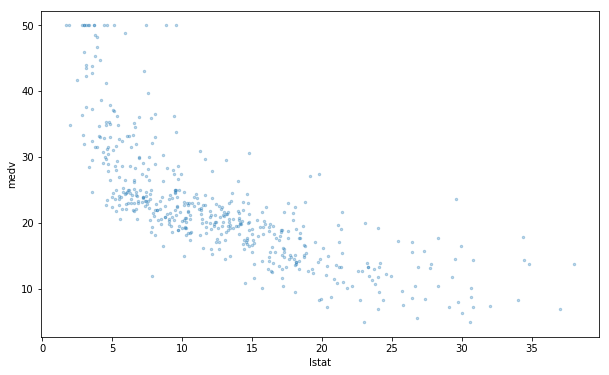

In [15]:
# plot lstat (% lower status of the population) against median value
# Doesn't look linear, does it?
plt.figure(figsize=(10, 6))
plt.scatter(df.lstat,df.medv,s=6,alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

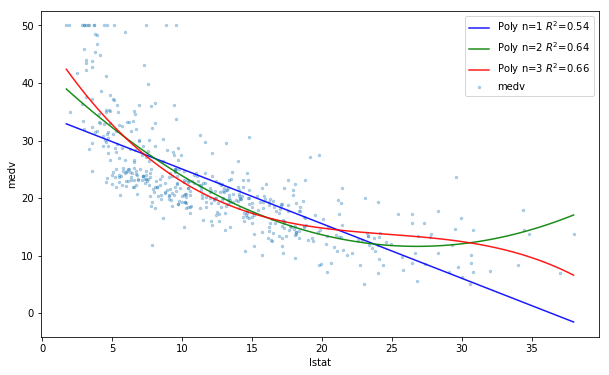

In [16]:
# Let's fit some lines to it!

# plot lstat (% lower status of the population) against median value
plt.figure(figsize=(10, 6))
plt.scatter(df.lstat, df.medv, s=6, alpha=0.3)
plt.xlabel('lstat')
plt.ylabel('medv')

# points linearly space on lstat
x = pd.DataFrame({'lstat': np.linspace(df.lstat.min(), df.lstat.max(), 100)})

# 1st order polynomial
poly_1 = smf.ols(formula='medv ~ 1 +I(lstat)', data=df).fit()
plt.plot(x.lstat, poly_1.predict(x), 'b-', label='Poly n=1 $R^2$={:.2f}'.format(poly_1.rsquared), 
         alpha=0.9)

# 2nd order polynomial
poly_2 = smf.ols(formula='medv ~ 1 + lstat + I(lstat**2)', data=df).fit()
plt.plot(x.lstat, poly_2.predict(x), 'g-', label='Poly n=2 $R^2$={:.2f}'.format(poly_2.rsquared), 
         alpha=0.9)

# 3rd order polynomial
poly_3 = smf.ols(formula='medv ~ 1 + lstat + I(lstat**2) + I(lstat**3)', data=df).fit()
plt.plot(x.lstat, poly_3.predict(x), 'r-', alpha=0.9,
         label='Poly n=3 $R^2$={:.2f}'.format(poly_3.rsquared_adj))

plt.legend()

In [17]:
#Were our lines we fit needed? Should we stop at order 2 or 3?

In [18]:
poly_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Tue, 29 Aug 2017   Prob (F-statistic):           5.08e-88
Time:                        12:40:04   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
I(lstat)      -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
poly_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 29 Aug 2017   Prob (F-statistic):          1.56e-112
Time:                        12:40:04   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000      41.149      44.575
lstat            -2.3328      0.124    -18.843      0.000      -2.576      -2.090
I(lstat ** 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
poly_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     321.7
Date:                Tue, 29 Aug 2017   Prob (F-statistic):          1.78e-116
Time:                        12:40:04   Log-Likelihood:                -1568.9
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     502   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        48.6496      1.435     33.909      0.000      45.831      51.468
lstat            -3.8656      0.329    -11.757      0.000      -4.512      -3.220
I(lstat ** 2)     0.1487      0.021      6.983      0.000       0.107       0.191
I(lstat ** 3)    -0.0020      0.000     -5.013      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      107.925   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.171
Skew:                           1.088   Prob(JB):                     8.69e-57
Kurtosis:                       5.741   Cond. No.                     5.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""